In [8]:
import cv2
import os
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
import torch
from tqdm import tqdm
import torch.optim as optim
import torch.nn as nn
from model import HPCFNet
from data.processing import make_dataset
from train import train
import numpy as np

In [9]:
model = HPCFNet(64)
model.load_state_dict(torch.load("state_dict\\48.pt"))

<All keys matched successfully>

In [10]:
make_dataset()
dataset = torch.load("dataset.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)#

100%|██████████| 100/100 [00:00<00:00, 135.98it/s]


HPCFNet(
  (conv_1_2_a): ConvBlock(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (relu): ReLU(inplace=True)
  )
  (conv_1_2_b): ConvBlock(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (relu): ReLU(inplace=True)
  )
  (conv_2_2_a): ConvBlock(
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (relu): ReLU(inplace=True)
  )
  (c

In [11]:
train_losses = []
valid_losses = []
train_losses, valid_losses = train(device, model, dataset, 50)

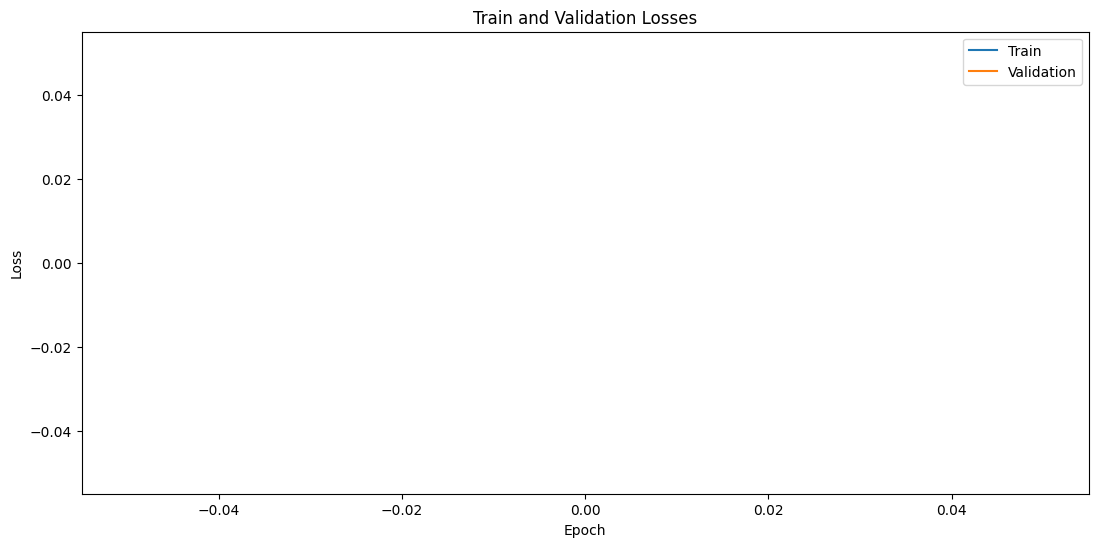

In [12]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(1, figsize=(13, 6))

ax1.plot(train_losses, label='Train')
ax1.plot(valid_losses, label='Validation')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Train and Validation Losses')
ax1.legend()

In [13]:
def view_output(i):
    img = dataset[i][0].to(device)
    img = img.unsqueeze(0)
    output = model(img)
    _, predicted = torch.max(output.data, 1)
    b = predicted.int().cpu().numpy().transpose(2, 1, 0)*255
    file_mask = ".\\TSUNAMI\\mask\\{:08d}.png".format(i)
    r = np.expand_dims(np.array(cv2.imread(file_mask, cv2.IMREAD_GRAYSCALE)), axis=2)
    g = np.zeros_like(b)
    out = np.concatenate((b,g,r), axis = 2)
    cv2.imwrite(".\\output\\{}.jpg".format(i), out)


In [14]:
for i in range(100):
    view_output(i)